In [1]:
# Import pandas for manipulating numerical tables
import pandas as pd

# Import numpy for numerical calculations
import numpy as np

# Import matplotlib for plotting data
import matplotlib.pyplot as plt
#%matplotlib inline

# Import scipy-stats for statistical analysis and outlier detection
from scipy import stats as st

# Import missingno for visualizations
import missingno as msno

# Import for splitting model
from sklearn.model_selection import train_test_split

# Import for VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import for classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Import to show python version
from platform import python_version

# Import for model variable reduction
from sklearn.feature_selection import SelectKBest

# Import for scaling data
from sklearn.preprocessing import StandardScaler

# Import for KNN model creation
from sklearn.neighbors import KNeighborsClassifier

# Import for ROC curve
from sklearn.metrics import roc_curve

# Import for AUC score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Python version used for this analysis is: ', python_version())

Python version used for this analysis is:  3.9.13


In [3]:
# Importing the churn dataset
df = pd.read_csv('C:/users/eric7/D209/churn_clean.csv')

In [4]:
# Just checking to see if the data is there
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
# Check shape of df
print(df.shape)
# 10000 rows or instances and 50 columns or variables

(10000, 50)


In [6]:
# Check df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

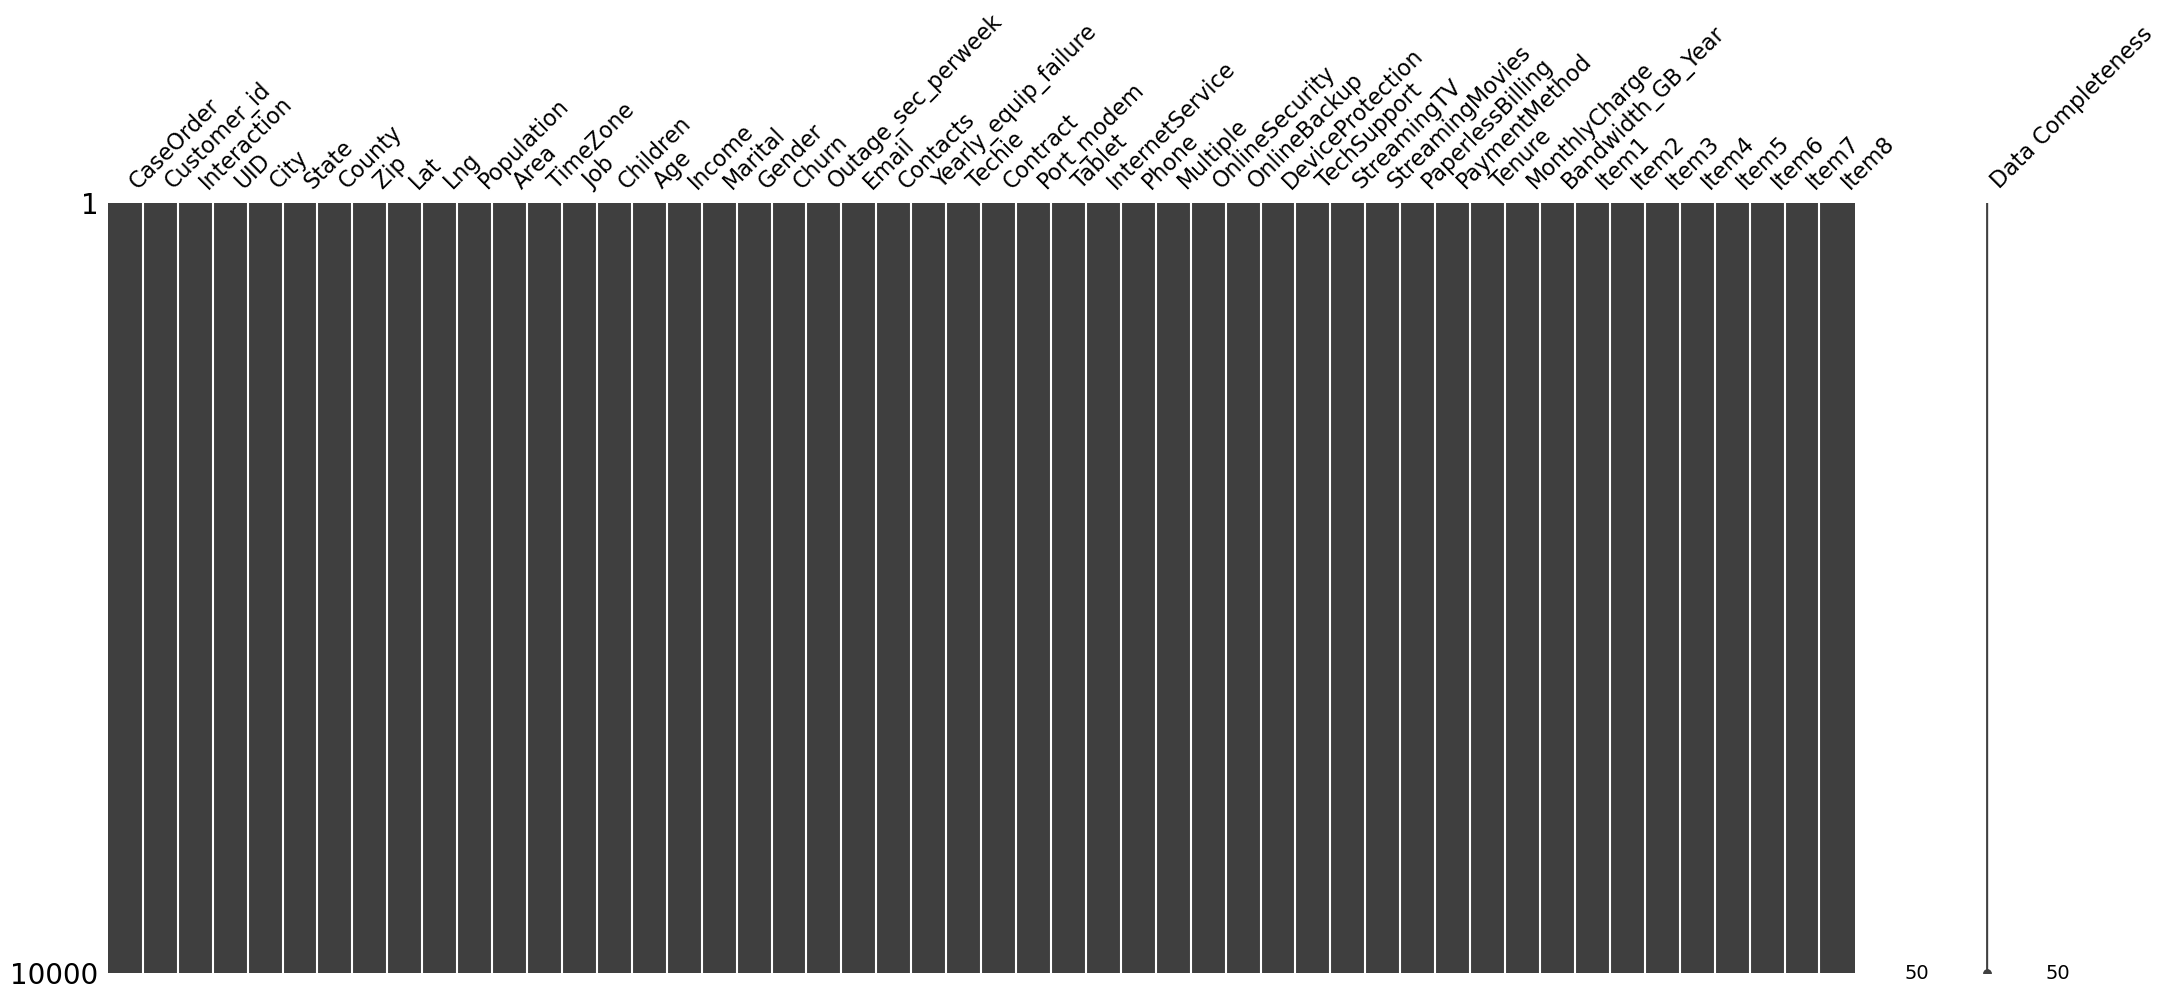

In [7]:
# Visualize df for missingness
msno.matrix(df, labels = True)
plt.show()

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# Create a copy of df to preserve original
df1 = df.copy()

In [10]:
# Create df1 for initial model--
# Dropping columns CaseOrder, Customer_id, Interaction_UID, City,
# State, County, Zip, Lat, Lng, TimeZone, Job, and Item1 thru Item8
df1 = df1[['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 
           'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'PaymentMethod', 'Tenure', 
           'MonthlyCharge', 'Bandwidth_GB_Year']]

In [11]:
# Check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [12]:
# Checking shape for initial model
df1.shape

(10000, 30)

In [13]:
# Checking variables unique values for validity
print(df1['Population'].sort_values().unique())

[     0      2      4 ... 102433 103732 111850]


In [14]:
# Check before replacement
df1['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [15]:
# Checking variables unique values for validity
print(df1['Area'].sort_values().unique())

['Rural' 'Suburban' 'Urban']


In [16]:
# Check before replacement
df1['Area'].describe()

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

In [17]:
# Get the counts for each
df1['Area'].value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [18]:
# Checking variables unique values for validity
print(df1['Children'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10]


In [19]:
# Get statistics of the variable
df1['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [20]:
# Checking variables unique values for validity
print(df1['Age'].sort_values().unique())

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [21]:
# Get statistics of the variable
df1['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [22]:
# Checking variables unique values for validity
print(df1['Income'].sort_values().unique())

[   348.67    368.5     630.24 ... 231252.   256998.4  258900.7 ]


In [23]:
# Get statistics of the variable
df1['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [24]:
# Checking variables unique values for validity
print(df1['Marital'].sort_values().unique())

['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']


In [25]:
# Get statistics of the variable
df1['Marital'].describe()

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object

In [26]:
# Get the counts for each
df1['Marital'].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [27]:
# Checking variables unique values for validity
print(df1['Gender'].sort_values().unique())

['Female' 'Male' 'Nonbinary']


In [28]:
# Get statistics of the variable
df1['Gender'].describe()

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

In [29]:
# Get the counts for each
df1['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [30]:
# Checking variables unique values for validity
print(df1['Churn'].sort_values().unique())

['No' 'Yes']


In [31]:
# Get statistics of the variable
df1['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [32]:
# Get the counts for each
df1['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [33]:
# Checking variables unique values for validity
print(df1['Outage_sec_perweek'].sort_values().unique())

[ 0.09974694  0.12005772  0.2322795  ... 20.30462    20.62504
 21.20723   ]


In [34]:
# Get statistics of the variable
df1['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [35]:
# Checking variables unique values for validity
print(df1['Email'].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [36]:
# Get statistics of the variable
df1['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

In [37]:
# Checking variables unique values for validity
print(df1['Contacts'].sort_values().unique())

[0 1 2 3 4 5 6 7]


In [38]:
# Get statistics of the variable
df1['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [39]:
# Checking variables unique values for validity
print(df1['Yearly_equip_failure'].sort_values().unique())

[0 1 2 3 4 6]


In [40]:
# Get statistics of the variable
df1['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [41]:
# Checking variables unique values for validity
print(df1['Techie'].sort_values().unique())

['No' 'Yes']


In [42]:
# Get statistics of the variable
df1['Techie'].describe()

count     10000
unique        2
top          No
freq       8321
Name: Techie, dtype: object

In [43]:
# Get the counts for each
df1['Techie'].value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [44]:
# Checking variables unique values for validity
print(df1['Contract'].sort_values().unique())

['Month-to-month' 'One year' 'Two Year']


In [45]:
# Get statistics of the variable
df1['Contract'].describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

In [46]:
# Get the counts for each
df1['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [47]:
# Checking variables unique values for validity
print(df1['Port_modem'].sort_values().unique())

['No' 'Yes']


In [48]:
# Get statistics of the variable
df1['Port_modem'].describe()

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object

In [49]:
# Get the counts for each
df1['Port_modem'].value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [50]:
# Checking variables unique values for validity
print(df1['Tablet'].sort_values().unique())

['No' 'Yes']


In [51]:
# Get statistics of the variable
df1['Tablet'].describe()

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object

In [52]:
# Get the counts for each
df1['Tablet'].value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [53]:
# Checking variables unique values for validity
print(df1['InternetService'].sort_values().unique())

['DSL' 'Fiber Optic' 'None']


In [54]:
# Get statistics of the variable
df1['InternetService'].describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [55]:
# Get the counts for each
df1['InternetService'].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [56]:
# Checking variables unique values for validity
print(df1['Phone'].sort_values().unique())

['No' 'Yes']


In [57]:
# Get statistics of the variable
df1['Phone'].describe()

count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object

In [58]:
# Get the counts for each
df1['Phone'].value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [59]:
# Checking variables unique values for validity
print(df1['Multiple'].sort_values().unique())

['No' 'Yes']


In [60]:
# Get statistics of the variable
df1['Multiple'].describe()

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

In [61]:
# Get the counts for each
df1['Multiple'].value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [62]:
# Checking variables unique values for validity
print(df1['OnlineSecurity'].sort_values().unique())

['No' 'Yes']


In [63]:
# Get statistics of the variable
df1['OnlineSecurity'].describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

In [64]:
# Get the counts for each
df1['OnlineSecurity'].value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [65]:
# Checking variables unique values for validity
print(df1['DeviceProtection'].sort_values().unique())

['No' 'Yes']


In [66]:
# Get statistics of the variable
df1['DeviceProtection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

In [67]:
# Get the counts for each
df1['DeviceProtection'].value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [68]:
# Checking variables unique values for validity
print(df1['TechSupport'].sort_values().unique())

['No' 'Yes']


In [69]:
# Get statistics of the variable
df1['TechSupport'].describe()

count     10000
unique        2
top          No
freq       6250
Name: TechSupport, dtype: object

In [70]:
# Get the counts for each
df1['TechSupport'].value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [71]:
# Checking variables unique values for validity
print(df1['StreamingTV'].sort_values().unique())

['No' 'Yes']


In [72]:
# Get statistics of the variable
df1['StreamingTV'].describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

In [73]:
# Get the counts for each
df1['StreamingTV'].value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [74]:
# Checking variables unique values for validity
print(df1['StreamingMovies'].sort_values().unique())

['No' 'Yes']


In [75]:
# Get statistics of the variable
df1['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

In [76]:
# Get the counts for each
df1['StreamingMovies'].value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [77]:
# Checking variables unique values for validity
print(df1['PaperlessBilling'].sort_values().unique())

['No' 'Yes']


In [78]:
# Get statistics of the variable
df1['PaperlessBilling'].describe()

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object

In [79]:
# Get the counts for each
df1['PaperlessBilling'].value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [80]:
# Checking variables unique values for validity
print(df1['PaymentMethod'].sort_values().unique())

['Bank Transfer(automatic)' 'Credit Card (automatic)' 'Electronic Check'
 'Mailed Check']


In [81]:
# Get statistics of the variable
df1['PaymentMethod'].describe()

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: PaymentMethod, dtype: object

In [82]:
# Get the counts for each
df1['PaymentMethod'].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [83]:
# Checking variables unique values for validity
print(df1['Tenure'].sort_values().unique())

[ 1.00025934  1.005104    1.0185196  ... 71.99373    71.99418
 71.99928   ]


In [84]:
# Get statistics of the variable
df1['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [85]:
# Checking variables unique values for validity
print(df1['MonthlyCharge'].sort_values().unique())

[ 79.97886   79.978861  82.496547  82.49655   92.45514   92.455141
  92.48802   92.488023  92.5018    94.972827  94.97283   95.005709
  95.00571   95.019486  95.01949  102.4746   102.474625 104.962874
 104.9629   104.9643   104.964303 104.97808  104.9781   104.9923
 104.992311 105.010962 105.011    107.48056  107.4806   107.481989
 107.482    107.495766 107.4958   107.5286   107.528648 112.4551
 112.455141 112.484375 112.4844   114.9509   114.950905 114.965789
 114.9658   114.9728   114.972827 114.983787 114.9838   114.997564
 114.9976   115.002061 115.0021   117.439154 117.4392   117.468591
 117.4686   117.472    117.472036 117.483475 117.4835   117.4858
 117.485813 117.4872   117.487242 117.5015   117.5152   117.51525
 119.9568   119.95684  119.9897   119.989722 120.003499 120.0035
 120.0049   120.004928 124.960655 124.9607   124.9643   124.964303
 124.97808  124.9781   124.9935   124.993537 125.0073   125.007314
 127.442069 127.4421   127.4586   127.458638 127.460067 127.4601
 127.4

In [86]:
# Get statistics of the variable
df1['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [87]:
# Checking variables unique values for validity
print(df1['Bandwidth_GB_Year'].sort_values().unique())

[ 155.5067148  169.3992798  223.4765826 ... 7096.494932  7138.308718
 7158.98153  ]


In [88]:
# Get statistics of the variable
df1['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [89]:
# Checking for ouliers using Z-scores--stats
df1['Z_population'] = st.zscore(df1['Population'])
df1[['Population', 'Z_population']].head()

,Population,Z_population
0,38,-0.673405
1,10446,0.047772
2,3735,-0.417238
3,13863,0.284537
4,11352,0.110549


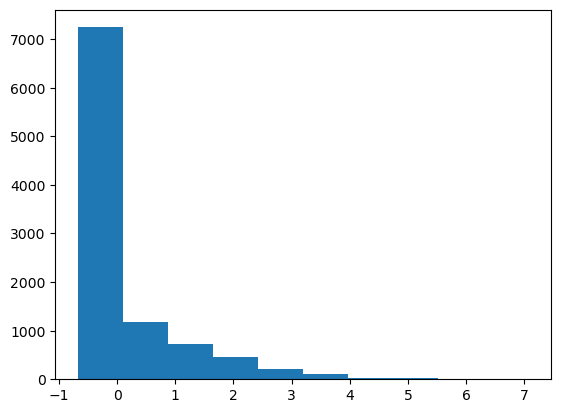

In [90]:
# Check it on the histogram...We can see we have outliers
plt.hist(df1['Z_population'])
plt.show()

In [91]:
# Check before replacement
df1['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [92]:
# Check how many instances are greater than 3 == 219 instances
df1[df1['Z_population']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Z_population
57,58431,Rural,1,33,15690.25,Widowed,Female,No,11.448751,11,...,Yes,Yes,No,Yes,Yes,Mailed Check,6.732949,142.515576,958.139706,3.372680
90,55519,Rural,0,75,58482.90,Separated,Female,Yes,8.294186,13,...,Yes,No,No,Yes,Yes,Mailed Check,2.188919,192.470522,409.748666,3.170906
100,55122,Urban,0,69,58077.38,Separated,Male,Yes,10.683118,12,...,Yes,Yes,Yes,Yes,Yes,Credit Card (automatic),14.462882,222.660939,1806.135733,3.143397
157,86926,Rural,1,39,20624.31,Divorced,Male,No,6.985590,9,...,No,Yes,Yes,No,Yes,Electronic Check,5.969967,174.961766,967.981914,5.347115
203,90517,Suburban,3,83,44223.58,Widowed,Female,No,7.352534,15,...,No,No,Yes,No,No,Electronic Check,14.171923,127.458638,1430.761492,5.595937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,54540,Urban,0,39,29732.28,Separated,Female,Yes,5.790541,11,...,Yes,No,Yes,Yes,No,Credit Card (automatic),66.508790,187.656000,6023.656633,3.103070
9728,54507,Urban,1,61,24614.25,Divorced,Female,No,5.982889,17,...,No,No,Yes,No,Yes,Bank Transfer(automatic),71.154680,137.439200,6016.376448,3.100784
9905,54413,Suburban,1,30,21246.03,Divorced,Male,No,4.759083,15,...,Yes,No,No,No,Yes,Credit Card (automatic),70.531170,140.001300,6599.191565,3.094270
9987,87509,Urban,3,61,102629.60,Married,Female,No,8.373844,8,...,Yes,No,Yes,Yes,No,Electronic Check,54.545380,220.161500,5135.575997,5.387511


In [93]:
#Make a new df for median imputation
df_pop = df1[['Population', 'Z_population']]

In [94]:
# Make the outliers equal to Nan
df_pop[(df_pop.Z_population > 3)] = np.nan

In [95]:
# Check before replacement
df_pop['Population'].describe()

count     9781.000000
mean      8504.807791
std      11755.975009
min          0.000000
25%        718.000000
50%       2737.000000
75%      11850.000000
max      52967.000000
Name: Population, dtype: float64

In [96]:
# Replace with median values--219
df_pop['Population'].fillna(df_pop['Population'].median(), inplace=True)

In [97]:
# Replace with no outliers
df1['Population'] = df_pop['Population']

In [98]:
# Check stats after median imputation
df1['Population'].describe()

count    10000.000000
mean      8378.492800
std      11657.129901
min          0.000000
25%        738.000000
50%       2737.000000
75%      11365.750000
max      52967.000000
Name: Population, dtype: float64

In [99]:
# Checking for ouliers using Z-scores--stats
df1['Z_children'] = st.zscore(df1['Children'])
df1[['Children', 'Z_children']].head()

,Children,Z_children
0,0,-0.972338
1,1,-0.506592
2,4,0.890646
3,1,-0.506592
4,0,-0.972338


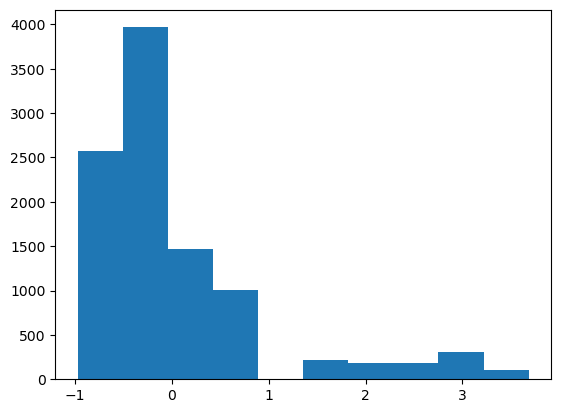

In [100]:
# Check it on the histogram...We can see we have outliers
plt.hist(df1['Z_children'])
plt.show()

In [101]:
# Check how many instances are greater than 3
df1[df1['Z_children']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Z_population,Z_children
30,11268.0,Urban,9,45,43383.54,Married,Male,No,6.613071,14,...,No,Yes,Yes,Yes,Credit Card (automatic),11.082878,230.105118,1795.465729,0.104728,3.219376
97,521.0,Suburban,10,23,64816.84,Divorced,Male,Yes,5.271229,14,...,Yes,Yes,No,No,Mailed Check,12.976322,187.484705,1956.733700,-0.639937,3.685122
144,15171.0,Suburban,10,76,35954.77,Married,Male,Yes,13.715554,14,...,No,No,Yes,Yes,Electronic Check,3.237560,137.461553,819.419527,0.375169,3.685122
329,26381.0,Urban,9,19,40902.49,Married,Female,Yes,8.816498,8,...,No,Yes,Yes,Yes,Mailed Check,11.103564,222.679213,1973.661316,1.151917,3.219376
334,5978.0,Suburban,9,79,11179.42,Never Married,Female,No,10.494952,11,...,No,No,No,Yes,Electronic Check,8.701581,127.478341,1451.201108,-0.261819,3.219376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9623,2737.0,Urban,10,79,42222.25,Married,Female,No,9.315470,14,...,Yes,No,Yes,No,Mailed Check,68.033240,172.456700,6432.294015,3.014794,3.685122
9676,3738.0,Rural,9,30,29388.05,Married,Male,No,9.784614,8,...,Yes,No,Yes,No,Mailed Check,64.280750,127.475000,5851.532323,-0.417030,3.219376
9790,1995.0,Rural,10,31,23693.22,Married,Male,No,12.947090,13,...,No,Yes,Yes,Yes,Electronic Check,71.406390,242.628100,6900.075325,-0.537803,3.685122
9871,1691.0,Urban,10,18,19351.19,Widowed,Female,No,7.845888,13,...,No,No,Yes,Yes,Electronic Check,64.027710,142.482700,6388.161243,-0.558867,3.685122


In [102]:
#Make a new df for median imputation
df_child = df1[['Children', 'Z_children']]

In [103]:
# Make the outliers equal to Nan
df_child[(df_child.Z_children > 3)] = np.nan

In [104]:
# Check before replacement
df_child['Children'].describe()

count    9809.000000
mean        1.943012
std         1.897161
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         8.000000
Name: Children, dtype: float64

In [105]:
# Replace with median values--219
df_child['Children'].fillna(df_child['Children'].median(), inplace=True)

In [106]:
# Replace with no outliers
df1['Children'] = df_child['Children']

In [107]:
# Check stats after median imputation
df1['Children'].describe()

count    10000.000000
mean         1.925000
std          1.883383
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          8.000000
Name: Children, dtype: float64

In [108]:
# Checking for ouliers using Z-scores--stats
df1['Z_age'] = st.zscore(df1['Age'])
df1[['Age', 'Z_age']].head()

,Age,Z_age
0,68,0.720925
1,27,-1.259957
2,50,-0.148730
3,48,-0.245359
4,83,1.445638


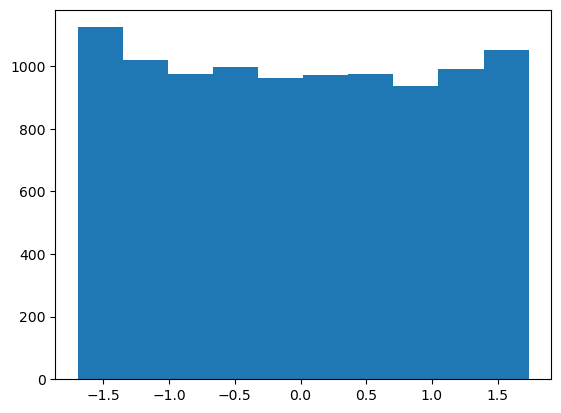

In [109]:
# Check it on the histogram--no outliers
plt.hist(df1['Z_age'])
plt.show()

In [110]:
# Checking for ouliers using Z-scores--stats
df1['Z_income'] = st.zscore(df1['Income'])
df1[['Income', 'Z_income']].head()

,Income,Z_income
0,28561.99,-0.398778
1,21704.77,-0.641954
2,9609.57,-1.070885
3,18925.23,-0.740525
4,40074.19,0.009478


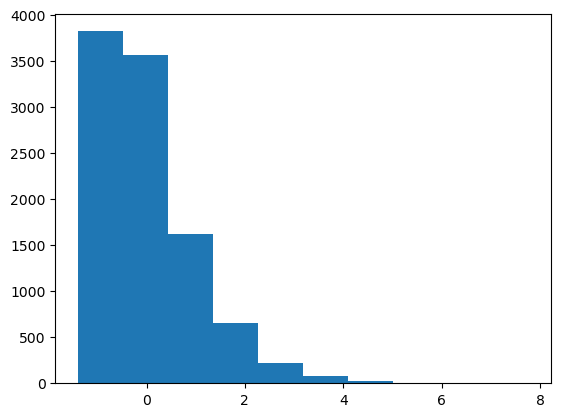

In [111]:
# Check it on the histogram
plt.hist(df1['Z_income'])
plt.show()

In [112]:
# Make a new df for median imputation
df_income = df1[['Income', 'Z_income']]

In [113]:
# Make the outliers equal to Nan
df_income[(df_income.Z_income > 3)] = np.nan

In [114]:
# Check stats before replacement
df['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [115]:
# Replace with mean values
df_income['Income'].fillna(df_income['Income'].mean(), inplace=True)

In [116]:
# Replace with no outliers
df1['Income'] = df_income['Income']

In [117]:
# Check after replacement
df1['Income'].describe()

count     10000.000000
mean      38224.438163
std       24843.456231
min         348.670000
25%       19224.717500
50%       33170.605000
75%       51669.637500
max      124025.100000
Name: Income, dtype: float64

In [118]:
# Checking for ouliers using Z-scores--stats
df1['Z_outage_sec_perweek'] = st.zscore(df1['Outage_sec_perweek'])
df1[['Outage_sec_perweek', 'Z_outage_sec_perweek']].head()

,Outage_sec_perweek,Z_outage_sec_perweek
0,7.978323,-0.679978
1,11.699080,0.570331
2,10.752800,0.252347
3,14.913540,1.650506
4,8.147417,-0.623156


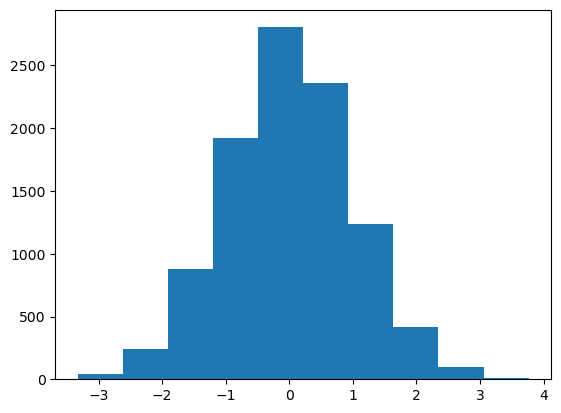

In [119]:
# Check it on the histogram
plt.hist(df1['Z_outage_sec_perweek'])
plt.show()

In [120]:
# Make a new df for median imputation
df_outage = df1[['Outage_sec_perweek', 'Z_outage_sec_perweek']]

In [121]:
# Make the outliers equal to Nan
df_outage[(df_outage.Z_outage_sec_perweek > 3)] = np.nan

In [122]:
# Make the outliers equal to Nan
df_outage[(df_outage.Z_outage_sec_perweek <- 3)] = np.nan

In [123]:
# Check original stats before replacement
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [124]:
# Replace with mean values
df_outage['Outage_sec_perweek'].fillna(df_outage['Outage_sec_perweek'].mean(), inplace=True)

In [125]:
# Replace with no outliers
df1['Outage_sec_perweek'] = df_outage['Outage_sec_perweek']

In [126]:
# Check after replacement
df1['Outage_sec_perweek'].describe()

count    10000.000000
mean         9.999789
std          2.933316
min          1.144796
25%          8.033911
50%         10.002880
75%         11.955480
max         18.851730
Name: Outage_sec_perweek, dtype: float64

In [127]:
# Checking for ouliers using Z-scores--stats
df1['Z_email'] = st.zscore(df1['Email'])
df1[['Email', 'Z_email']].head()

,Email,Z_email
0,10,-0.666282
1,12,-0.005288
2,9,-0.996779
3,15,0.986203
4,16,1.316700


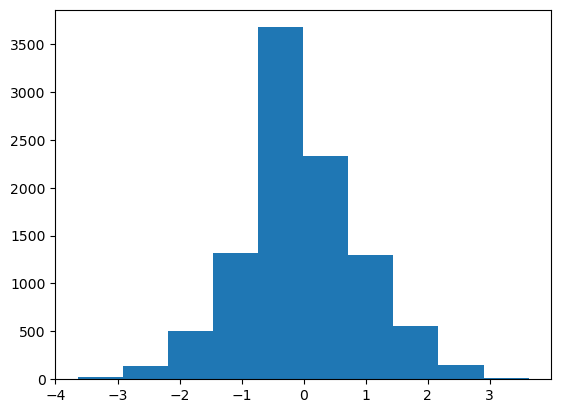

In [128]:
# Check it on the histogram
plt.hist(df1['Z_email'])
plt.show()

In [129]:
#Make a new df for median imputation
df_email = df1[['Email', 'Z_email']]

In [130]:
# Make the outliers equal to Nan
df_email[(df_email.Z_email > 3)] = np.nan

In [131]:
# Make the outliers equal to Nan
df_email[(df_email.Z_email <- 3)] = np.nan

In [132]:
# Replace with median values
df_email['Email'].fillna(df_email['Email'].median(), inplace=True)

In [133]:
# Replace with no outliers
df1['Email'] = df_email['Email']

In [134]:
# Check original stats
df['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

In [135]:
# Check stats after mean imputation
df1['Email'].describe()

count    10000.000000
mean        12.022200
std          3.004565
min          3.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         21.000000
Name: Email, dtype: float64

In [136]:
# Checking for ouliers using Z-scores--stats
df1['Z_contacts'] = st.zscore(df1['Contacts'])
df1[['Contacts', 'Z_contacts']].head()

,Contacts,Z_contacts
0,0,-1.005852
1,0,-1.005852
2,0,-1.005852
3,2,1.017588
4,2,1.017588


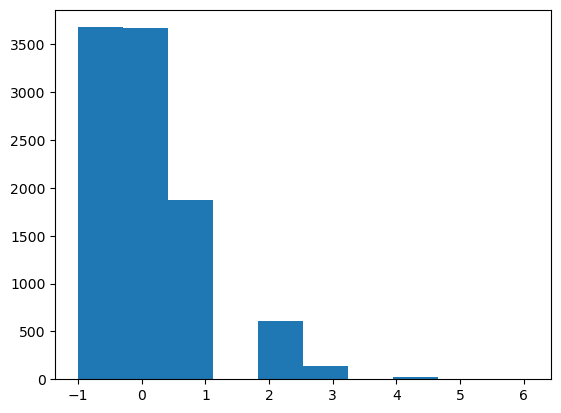

In [137]:
# Check it on the histogram
plt.hist(df1['Z_contacts'])
plt.show()

In [138]:
# Make a new df for median imputation
df_contacts = df1[['Contacts', 'Z_contacts']]

In [139]:
# Make the outliers equal to Nan
df_contacts[(df_contacts.Z_contacts > 3)] = np.nan

In [140]:
# Check original stats before replacement
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [141]:
# Replace with median values--165
df_contacts['Contacts'].fillna(df_contacts['Contacts'].median(), inplace=True)

In [142]:
# Replace with no outliers
df1['Contacts'] = df_contacts['Contacts']

In [143]:
# Check after replacement
df1['Contacts'].describe()

count    10000.000000
mean         0.940800
std          0.891614
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Contacts, dtype: float64

In [144]:
# Checking for ouliers using Z-scores--stats
df1['Z_yearly_equip_fail'] = st.zscore(df1['Yearly_equip_failure'])
df1[['Yearly_equip_failure', 'Z_yearly_equip_fail']].head()

,Yearly_equip_failure,Z_yearly_equip_fail
0,1,0.946658
1,1,0.946658
2,1,0.946658
3,0,-0.625864
4,1,0.946658


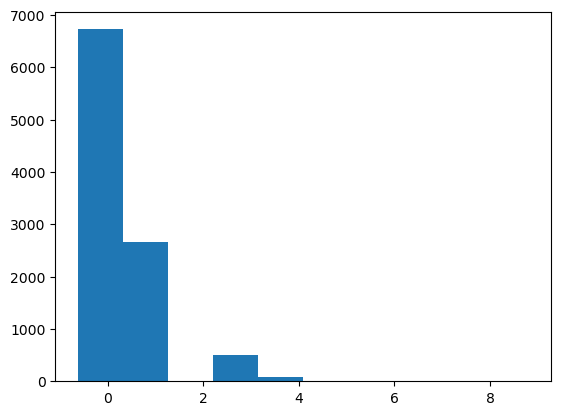

In [145]:
# Check it on the histogram
plt.hist(df1['Z_yearly_equip_fail'])
plt.show()

In [146]:
# Make a new df for median imputation
df_yearly = df1[['Yearly_equip_failure', 'Z_yearly_equip_fail']]

In [147]:
# Make the outliers equal to Nan
df_yearly[(df_yearly.Z_yearly_equip_fail > 3)] = np.nan

In [148]:
# Check original stats before replacement
df['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [149]:
# Replace with median values
df_yearly['Yearly_equip_failure'].fillna(df_yearly['Yearly_equip_failure'].median(), inplace=True)

In [150]:
# Replace with no outliers
df1['Yearly_equip_failure'] = df_yearly['Yearly_equip_failure']

In [151]:
# Check after replacement
df1['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.368800
std          0.578464
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Yearly_equip_failure, dtype: float64

In [152]:
# Checking for ouliers using Z-scores--stats
df1['Z_tenure'] = st.zscore(df1['Tenure'])
df1[['Tenure', 'Z_tenure']].head()

,Tenure,Z_tenure
0,6.795513,-1.048746
1,1.156681,-1.262001
2,15.754144,-0.709940
3,17.087227,-0.659524
4,1.670972,-1.242551


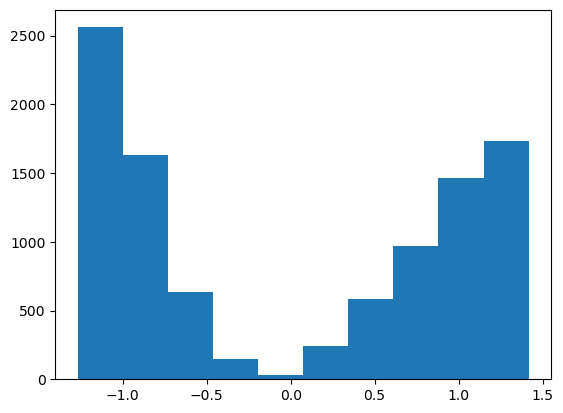

In [153]:
# Check it on the histogram
plt.hist(df1['Z_tenure'])
plt.show()

In [154]:
# Checking for ouliers using Z-scores--stats
df1['Z_monthly_charge'] = st.zscore(df1['MonthlyCharge'])
df1[['MonthlyCharge', 'Z_monthly_charge']].head()

,MonthlyCharge,Z_monthly_charge
0,172.455519,-0.003943
1,242.632554,1.630326
2,159.947583,-0.295225
3,119.956840,-1.226521
4,149.948316,-0.528086


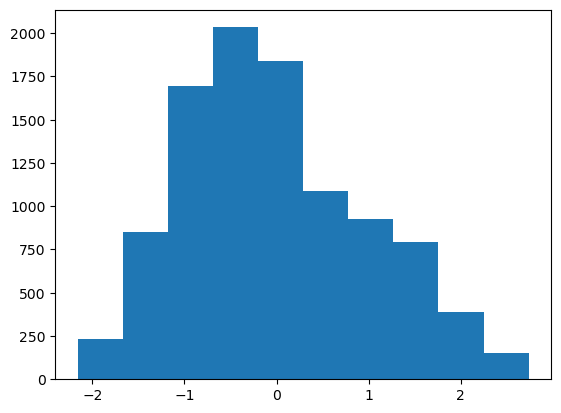

In [155]:
# Check it on the histogram
plt.hist(df1['Z_monthly_charge'])
plt.show()

In [156]:
# Checking for ouliers using Z-scores--stats
df1['Z_bandwidth_gb_year'] = st.zscore(df1['Bandwidth_GB_Year'])
df1[['Bandwidth_GB_Year', 'Z_bandwidth_gb_year']].head()

,Bandwidth_GB_Year,Z_bandwidth_gb_year
0,904.536110,-1.138487
1,800.982766,-1.185876
2,2054.706961,-0.612138
3,2164.579412,-0.561857
4,271.493436,-1.428184


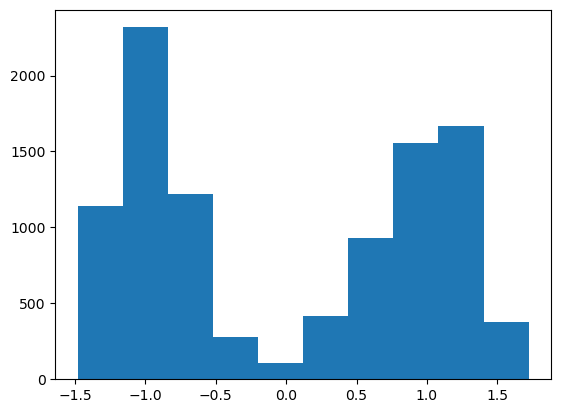

In [157]:
# Check it on the histogram
plt.hist(df1['Z_bandwidth_gb_year'])
plt.show()

In [158]:
# Check df info
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  float64
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  float64
 10  Contacts              10000 non-null  float64
 11  Yearly_equip_failure  10000 non-null  float64
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [159]:
# Check shape
df1.shape

(10000, 41)

In [160]:
# Make new df without Z-score columns
df2 = df1[['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 
           'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'PaymentMethod', 'Tenure', 
           'MonthlyCharge', 'Bandwidth_GB_Year']]

In [161]:
# Check shape
df2.shape

(10000, 30)

In [162]:
# Ordinal encoding all variables with Yes,No
df2['Churn'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Techie'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Port_modem'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Tablet'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Phone'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Multiple'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['OnlineSecurity'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['OnlineBackup'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['DeviceProtection'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['TechSupport'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['StreamingTV'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['StreamingMovies'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['PaperlessBilling'].replace(['No', 'Yes'], [0,1], inplace=True)

In [163]:
# get_dummies encoding with K-1
x1 = ['Area', 'Marital', 'Gender', 
      'InternetService', 'PaymentMethod']
df2 = pd.get_dummies(df2, prefix=x1, prefix_sep='_', dummy_na=False,
                    columns=x1, drop_first=True)

In [164]:
df2['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [165]:
c1 = ['Contract']
df2 = pd.get_dummies(df2, prefix=c1, prefix_sep='_', dummy_na=False,
                    columns=c1)

In [166]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  float64
 1   Children                               10000 non-null  float64
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Churn                                  10000 non-null  int64  
 5   Outage_sec_perweek                     10000 non-null  float64
 6   Email                                  10000 non-null  float64
 7   Contacts                               10000 non-null  float64
 8   Yearly_equip_failure                   10000 non-null  float64
 9   Techie                                 10000 non-null  int64  
 10  Port_modem                             10000 non-null  int64  
 11  Tab

In [167]:
# Check shape of df2
print(df2.shape)

(10000, 40)


In [168]:
complete_df = df2

In [169]:
# Extracting csv file of clean dataset
complete_df.to_csv(r'C:\Users\eric7\OneDrive\Desktop\WGU\D209_Data_Mining_1\\Eric_Colwell_clean_dataset.csv')

In [170]:
X=df2.drop(['Churn'], axis=1)
y=df2['Churn']

In [171]:
print(X.shape)
print(y.shape)

(10000, 39)
(10000,)


In [172]:
feature_names=X.columns
skbest=SelectKBest(k='all')
X_new = skbest.fit_transform(X, y)

In [173]:
X_new.shape

(10000, 39)

In [174]:
p_values=pd.DataFrame({'Feature': X.columns,
                      'p_value':skbest.pvalues_}).sort_values('p_value')

In [175]:
p_values[p_values['p_value'] < 0.05]

,Feature,p_value
22,Bandwidth_GB_Year,0.000000e+00
21,MonthlyCharge,0.000000e+00
20,Tenure,0.000000e+00
18,StreamingMovies,5.393071e-192
36,Contract_Month-to-month,1.236727e-163
17,StreamingTV,2.414257e-120
38,Contract_Two Year,3.019204e-72
37,Contract_One year,2.359068e-44
12,Multiple,5.642495e-40
8,Techie,2.408802e-11


In [176]:
features_to_keep=p_values['Feature'][p_values['p_value'] <.05]
features_to_keep

22                 Bandwidth_GB_Year
21                     MonthlyCharge
20                            Tenure
18                   StreamingMovies
36           Contract_Month-to-month
17                       StreamingTV
38                 Contract_Two Year
37                 Contract_One year
12                          Multiple
8                             Techie
31       InternetService_Fiber Optic
15                  DeviceProtection
14                      OnlineBackup
32              InternetService_None
34    PaymentMethod_Electronic Check
29                       Gender_Male
11                             Phone
Name: Feature, dtype: object

In [177]:
# Make new df with p_values less than 0.05
df3 = df2[['Churn', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure',
          'StreamingMovies', 'Contract_Month-to-month',
          'StreamingTV', 'Contract_Two Year', 'Contract_One year',
          'Multiple', 'Techie', 'InternetService_Fiber Optic',
          'DeviceProtection', 'OnlineBackup', 'InternetService_None',
          'PaymentMethod_Electronic Check', 'Gender_Male',
          'Phone']]

In [178]:
df3.shape

(10000, 18)

In [179]:
# Looking for high correlation between variables
matrix = df3.corr()
print(matrix)

                                   Churn  Bandwidth_GB_Year  MonthlyCharge  \
Churn                           1.000000          -0.441669       0.372938   
Bandwidth_GB_Year              -0.441669           1.000000       0.060406   
MonthlyCharge                   0.372938           0.060406       1.000000   
Tenure                         -0.485475           0.991495      -0.003337   
StreamingMovies                 0.289262           0.045600       0.608115   
Contract_Month-to-month         0.267653          -0.014497      -0.012261   
StreamingTV                     0.230151           0.054314       0.482312   
Contract_Two Year              -0.178337           0.020566       0.002262   
Contract_One year              -0.139043          -0.003969       0.012599   
Multiple                        0.131771           0.006823       0.385979   
Techie                          0.066722          -0.009455       0.007185   
InternetService_Fiber Optic    -0.058472          -0.061956     

In [180]:
# Dropping Tenure due to high correlation with Bandwidth_GB_Year
df3 = df3.drop(['Tenure'], axis=1)

In [181]:
df3.shape

(10000, 17)

In [182]:
X=df3.drop(['Churn'], axis=1)
y=df3['Churn']

In [183]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                           Feature        VIF
0                Bandwidth_GB_Year   1.018552
1                    MonthlyCharge  15.907459
2                  StreamingMovies   6.872077
3          Contract_Month-to-month  50.349703
4                      StreamingTV   4.832178
5                Contract_Two Year  23.216576
6                Contract_One year  20.149911
7                         Multiple   3.260394
8                           Techie   1.001127
9      InternetService_Fiber Optic   2.091425
10                DeviceProtection   1.334272
11                    OnlineBackup   2.087345
12            InternetService_None   1.526877
13  PaymentMethod_Electronic Check   1.001055
14                     Gender_Male   1.001674
15                           Phone   1.001860


In [184]:
# Removing MonthlyCharge and Contract_Two Year due to high VIF
X=df3.drop(['Churn', 'MonthlyCharge', 'Contract_Two Year'], axis=1)

In [185]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                           Feature       VIF
0                Bandwidth_GB_Year  3.107640
1                  StreamingMovies  1.901154
2          Contract_Month-to-month  2.836364
3                      StreamingTV  1.908183
4                Contract_One year  1.720435
5                         Multiple  1.790102
6                           Techie  1.192495
7      InternetService_Fiber Optic  2.098678
8                 DeviceProtection  1.724905
9                     OnlineBackup  1.771328
10            InternetService_None  1.538107
11  PaymentMethod_Electronic Check  1.485550
12                     Gender_Male  1.837018
13                           Phone  6.384130


In [186]:
X.shape

(10000, 14)

In [187]:
df3 = df3.drop(['MonthlyCharge', 'Contract_Two Year'], axis = 1)

In [188]:
df3.shape

(10000, 15)

In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Bandwidth_GB_Year               10000 non-null  float64
 1   StreamingMovies                 10000 non-null  int64  
 2   Contract_Month-to-month         10000 non-null  uint8  
 3   StreamingTV                     10000 non-null  int64  
 4   Contract_One year               10000 non-null  uint8  
 5   Multiple                        10000 non-null  int64  
 6   Techie                          10000 non-null  int64  
 7   InternetService_Fiber Optic     10000 non-null  uint8  
 8   DeviceProtection                10000 non-null  int64  
 9   OnlineBackup                    10000 non-null  int64  
 10  InternetService_None            10000 non-null  uint8  
 11  PaymentMethod_Electronic Check  10000 non-null  uint8  
 12  Gender_Male                     1

In [190]:
scaler = StandardScaler()

In [191]:
# Scaling helps avoid bias towards variables that are on a larger scale
df3_pred = df3.drop(['Churn'], axis=1)
df3_pred_std = pd.DataFrame(scaler.fit_transform(df3_pred), columns=df3_pred.columns)
df3_resp = df3['Churn']
frames = [df3_resp, df3_pred_std]
df3_std = pd.concat(frames, axis=1)
print(df3_std.head())

   Churn  Bandwidth_GB_Year  StreamingMovies  Contract_Month-to-month  \
0      0          -1.138487         1.022247                -1.095767   
1      1          -1.185876         1.022247                 0.912603   
2      0          -0.612138         1.022247                -1.095767   
3      0          -0.561857        -0.978237                -1.095767   
4      1          -1.428184        -0.978237                 0.912603   

   StreamingTV  Contract_One year  Multiple    Techie  \
0    -0.985899           1.938395 -0.924445 -0.449198   
1     1.014302          -0.515891  1.081730  2.226191   
2    -0.985899          -0.515891  1.081730  2.226191   
3     1.014302          -0.515891 -0.924445  2.226191   
4     1.014302          -0.515891 -0.924445 -0.449198   

   InternetService_Fiber Optic  DeviceProtection  OnlineBackup  \
0                     1.126323          -0.88389      1.104203   
1                     1.126323          -0.88389     -0.905631   
2                   

In [192]:
# Split the data
X = df3_std.drop(['Churn'], axis=1)
y = df3_std['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=16, stratify=y)

In [193]:
frames_train = [X_train, y_train]
df3_train = pd.concat(frames_train, axis=1)

frames_test = [X_test, y_test]
df3_test = pd.concat(frames_test, axis=1)

In [194]:
# Extracting csv file of train test data
df3_train.to_csv(r'C:\Users\eric7\OneDrive\Desktop\WGU\D209_Data_Mining_1\\Eric_Colwell_train_dataset.csv')
df3_test.to_csv(r'C:\Users\eric7\OneDrive\Desktop\WGU\D209_Data_Mining_1\\Eric_Colwell_test_dataset.csv')

In [195]:
# Confirm split
print(len(df3_train))
print(len(df3_test))
print(df3_train['Churn'].value_counts())
print(df3_test['Churn'].value_counts())
print(len(df3_train[df3_train['Churn']==0])/len(df3_train))
print(len(df3_test[df3_test['Churn']==0])/len(df3_test))

7000
3000
0    5145
1    1855
Name: Churn, dtype: int64
0    2205
1     795
Name: Churn, dtype: int64
0.735
0.735


In [196]:
# Testing for over and underfitting
# Setting arrays to stroe train and test accuracies
neighbors = np.arange(1, 60)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [197]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

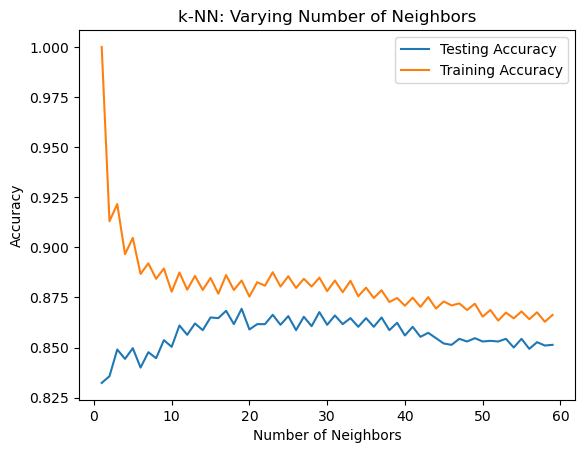

In [198]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [199]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.8513333333333334


In [200]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [201]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred))

[[2127   78]
 [ 368  427]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2205
           1       0.85      0.54      0.66       795

    accuracy                           0.85      3000
   macro avg       0.85      0.75      0.78      3000
weighted avg       0.85      0.85      0.84      3000



In [202]:
# Instantiate a k-NN classifier: knn with neighbors = 6
knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2095  110]
 [ 370  425]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2205
           1       0.79      0.53      0.64       795

    accuracy                           0.84      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.84      0.84      0.83      3000



In [203]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.84


In [204]:
# Instantiate a k-NN classifier: knn with neighbors = 8
knn = KNeighborsClassifier(n_neighbors=8)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2095  110]
 [ 356  439]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2205
           1       0.80      0.55      0.65       795

    accuracy                           0.84      3000
   macro avg       0.83      0.75      0.78      3000
weighted avg       0.84      0.84      0.83      3000



In [205]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.8446666666666667


In [206]:
# Instantiate a k-NN classifier: knn with neighbors = 10
knn = KNeighborsClassifier(n_neighbors=10)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2091  114]
 [ 335  460]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2205
           1       0.80      0.58      0.67       795

    accuracy                           0.85      3000
   macro avg       0.83      0.76      0.79      3000
weighted avg       0.85      0.85      0.84      3000



In [207]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.8503333333333334


In [208]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [209]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, 
                                                                y_pred_prob)

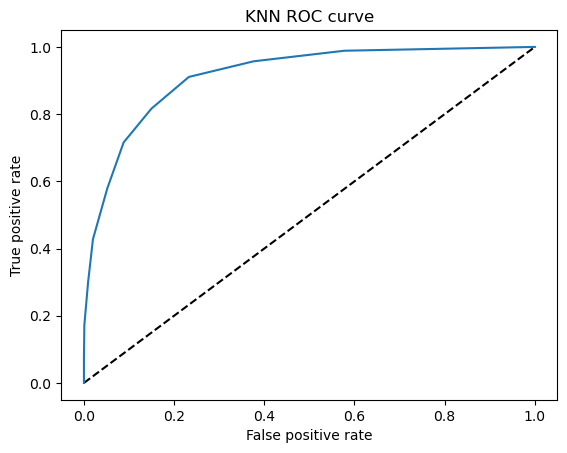

In [210]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = 'KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC curve')
plt.show()

In [211]:
# Print the AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: {}'.format(auc))

AUC: 0.9143670046635006


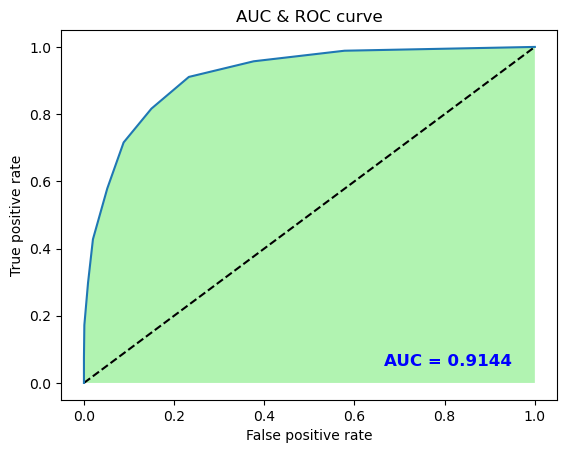

In [212]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = 'KNN')
plt.fill_between(false_positive_rate, true_positive_rate, 
                 facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', 
         fontsize=12, weight='bold', color='blue')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC & ROC curve')
plt.show()